In [1]:
import torch
from torch import nn
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias 


In [3]:
train_split = int(0.8 * len(X))
train_split

40

In [4]:
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

In [5]:
def plot_prediction(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test, predictions=None):
    plt.figure(figsize=(10, 7))
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")
    if(predictions is not None):
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
    plt.legend(prop={"size": 14})

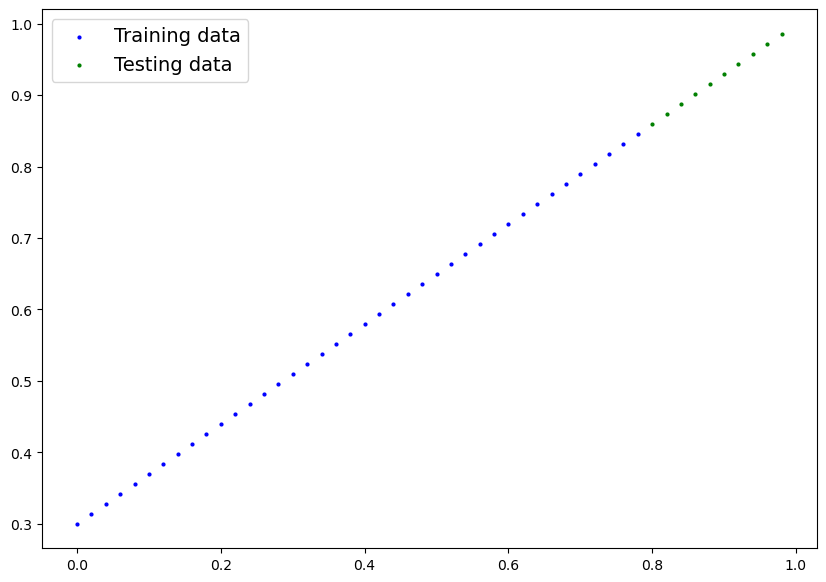

In [6]:
plot_prediction()

In [7]:
class LinearRegrassionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias 
        

In [8]:
torch.randn(1)

tensor([0.9374])

In [9]:
torch.rand(1)

tensor([0.1831])

In [10]:
torch.manual_seed(42)
model_0 = LinearRegrassionModel()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [11]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

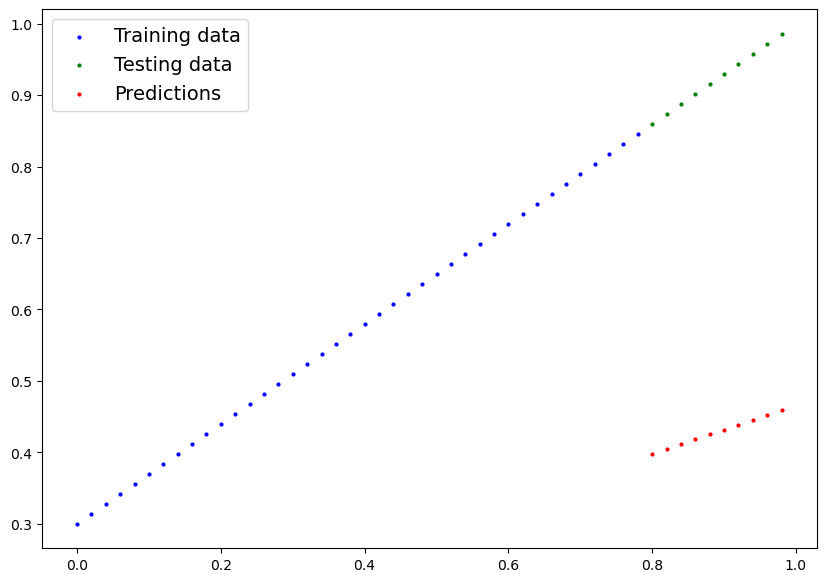

In [12]:
with torch.inference_mode():
    y_preds = model_0(X_test)

plot_prediction(predictions=y_preds)

In [13]:
loss_fn = nn.L1Loss()
loss_fn

L1Loss()

In [18]:
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.001)

In [19]:
torch.manual_seed(42)
epochs = 1000
for epoch in range(epochs):
    model_0.train()
    y_pred = model_0(X_train)
    loss = loss_fn(y_pred, y_train)
    print(loss)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    model_0.eval()
    with torch.inference_mode():
        test_pred = model_0(X_test)
        test_loss = loss_fn(test_pred, y_test)
        

tensor(0.3014, grad_fn=<MeanBackward0>)
tensor(0.3002, grad_fn=<MeanBackward0>)
tensor(0.2991, grad_fn=<MeanBackward0>)
tensor(0.2979, grad_fn=<MeanBackward0>)
tensor(0.2968, grad_fn=<MeanBackward0>)
tensor(0.2956, grad_fn=<MeanBackward0>)
tensor(0.2944, grad_fn=<MeanBackward0>)
tensor(0.2933, grad_fn=<MeanBackward0>)
tensor(0.2921, grad_fn=<MeanBackward0>)
tensor(0.2910, grad_fn=<MeanBackward0>)
tensor(0.2898, grad_fn=<MeanBackward0>)
tensor(0.2887, grad_fn=<MeanBackward0>)
tensor(0.2875, grad_fn=<MeanBackward0>)
tensor(0.2864, grad_fn=<MeanBackward0>)
tensor(0.2852, grad_fn=<MeanBackward0>)
tensor(0.2841, grad_fn=<MeanBackward0>)
tensor(0.2829, grad_fn=<MeanBackward0>)
tensor(0.2818, grad_fn=<MeanBackward0>)
tensor(0.2806, grad_fn=<MeanBackward0>)
tensor(0.2795, grad_fn=<MeanBackward0>)
tensor(0.2783, grad_fn=<MeanBackward0>)
tensor(0.2772, grad_fn=<MeanBackward0>)
tensor(0.2760, grad_fn=<MeanBackward0>)
tensor(0.2749, grad_fn=<MeanBackward0>)
tensor(0.2737, grad_fn=<MeanBackward0>)


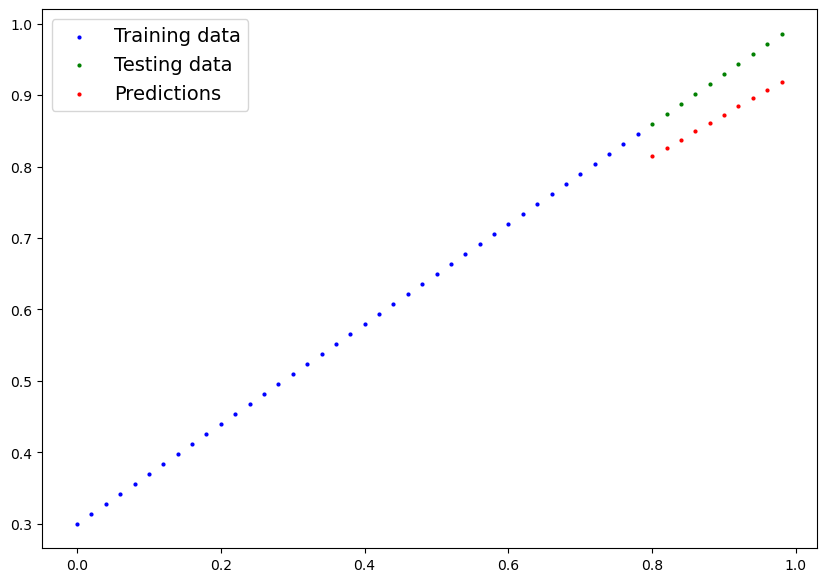

In [20]:
with torch.inference_mode():
    y_preds = model_0(X_test)
plot_prediction(predictions=y_preds)

In [21]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.5805])), ('bias', tensor([0.3502]))])

In [22]:
from pathlib import Path

In [24]:
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)
MODEL_NAME = "01_pytorch_workflow.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME 
MODEL_SAVE_PATH

PosixPath('models/01_pytorch_workflow.pth')

In [25]:
torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)

In [26]:
!ls -l models

total 4
-rw-rw-r-- 1 kacper kacper 1568 cze 25 08:39 01_pytorch_workflow.pth


In [27]:
loaded_model_0 = LinearRegrassionModel()
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [28]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.5805])), ('bias', tensor([0.3502]))])

In [29]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.5805])), ('bias', tensor([0.3502]))])